In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

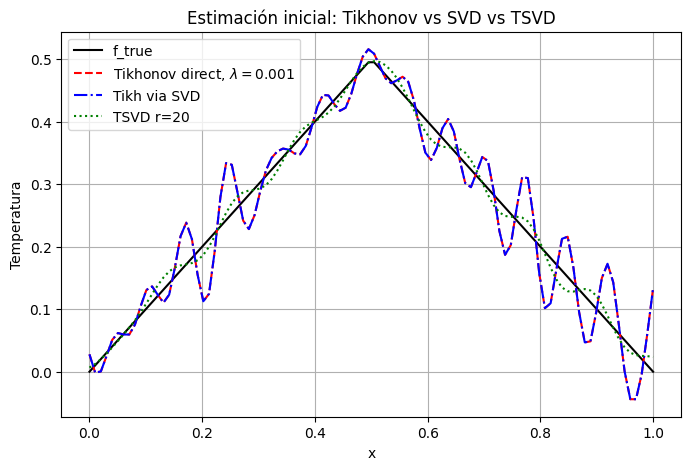

In [4]:


# 1) Dominio y perfil verdadero
n = 100
x = np.linspace(0, 1, n)
dx = x[1] - x[0]
f_true = 0.5 - np.abs(x - 0.5)

# 2) Matriz A (kernel del calor)
nu, t = 0.01, 0.05
K = np.exp(- (x[:,None]-x[None,:])**2/(4*nu*t)) / np.sqrt(4*np.pi*nu*t)
A = K * dx

# 3) Datos ruidosos
noise = 1e-2
b = A @ f_true + noise*np.random.randn(n)

# 4) Tikhonov (normal)
lam = 1e-3
f_tik = np.linalg.solve(A.T @ A + lam*np.eye(n), A.T @ b)

# 5) SVD de A
U, S, Vt = svd(A, full_matrices=False)

# 6) Tikhonov vía SVD
#    x_λ = V diag(s_i/(s_i^2+λ)) U^T b
f_tik_svd = Vt.T @ ((S/(S**2 + lam)) * (U.T @ b))

# 7) TSVD (Regularization by Filtering)
r = 20
#    x_r = sum_{i=1}^r (u_i^T b / s_i) v_i
f_tsvd = Vt.T[:,:r] @ ((U.T @ b)[:r] / S[:r])

# 8) Comparativa
plt.figure(figsize=(8,5))
plt.plot(x, f_true,    'k-',   label='f_true')
plt.plot(x, f_tik,     'r--',  label=rf'Tikhonov direct, $\lambda={lam}$')
plt.plot(x, f_tik_svd, 'b-.',  label='Tikh via SVD')
plt.plot(x, f_tsvd,    'g:',   label=f'TSVD r={r}')
plt.xlabel('x'); plt.ylabel('Temperatura')
plt.title('Estimación inicial: Tikhonov vs SVD vs TSVD')
plt.legend(); plt.grid(True)
plt.show()
